# Microsoft Movie Magic 

Data Analysis: Aaron Childress & Jill Carrie
Date: Dec 4 2019

Data Sources: IMDB (https://www.imdb.com/interfaces/), TheMovieDB.org (https://www.the-numbers.com/movie/budgets/all) & Box Office Mojo (https://www.boxofficemojo.com/yearly/chart/?view2=worldwide&yr=2010&p=.htm) 
The data folder in this repository contains all our raw data files, including form our additional EDA source Rotten Tomatoes.

**Problem: "What type of films are currently doing the best at the box office?"**
 
        (Seaborn PLOT - Gross(genre) vs Time - scatter and regression line)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline


In [11]:
df = pd.read_csv('data/new_df.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5698 entries, 0 to 5697
Data columns (total 42 columns):
Unnamed: 0             5698 non-null int64
tconst                 2440 non-null object
averagerating          2235 non-null float64
numvotes               2235 non-null float64
nconst                 2436 non-null object
primary_name           2388 non-null object
primary_profession     2355 non-null object
known_for_titles       2381 non-null object
ordering_x             2436 non-null float64
category               2436 non-null object
primary_title          2440 non-null object
start_year             2440 non-null float64
runtime_minutes        2305 non-null float64
genres                 2431 non-null object
Unnamed: 0.1           1924 non-null float64
genre_ids              1924 non-null object
original_language      1924 non-null object
original_title_y       1924 non-null object
popularity             1924 non-null float64
release_date_x         1924 non-null object
title  

In [12]:
df['release_date_y'] = pd.to_datetime(df['release_date_y'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5698 entries, 0 to 5697
Data columns (total 42 columns):
Unnamed: 0             5698 non-null int64
tconst                 2440 non-null object
averagerating          2235 non-null float64
numvotes               2235 non-null float64
nconst                 2436 non-null object
primary_name           2388 non-null object
primary_profession     2355 non-null object
known_for_titles       2381 non-null object
ordering_x             2436 non-null float64
category               2436 non-null object
primary_title          2440 non-null object
start_year             2440 non-null float64
runtime_minutes        2305 non-null float64
genres                 2431 non-null object
Unnamed: 0.1           1924 non-null float64
genre_ids              1924 non-null object
original_language      1924 non-null object
original_title_y       1924 non-null object
popularity             1924 non-null float64
release_date_x         1924 non-null object
title  

In [16]:
primary_genre = pd.read_csv('data\primary_genre.csv')
primary_genre.head()

,Unnamed: 0,category,primary_name,start_year,genres,averagerating,numvotes,runtime_minutes,movie,production_budget,domestic_gross,worldwide_gross,primary_genres,global_ROI,worldwide_gross_log,global_ROI_log,broad_genres,production_budget_log,net_profit
0,0,producer,NaN,2014,"['Action', 'Adventure', 'Fantasy']",4.2,50352.0,99.0,The Legend of Hercules,70000000,18848538,58953319,Action,-0.157810,17.892256,NaN,Action,18.064006,-11046681
1,1,editor,Jacquelyn Karambelas,2010,"['Biography', 'Drama', 'Sport']",7.0,1613.0,108.0,The Hammer,850000,442638,442638,Biography,-0.479249,13.000508,NaN,Documentary,13.652992,-407362
2,2,production_designer,Dina Lipton,2013,['Comedy'],5.1,8296.0,96.0,Baggage Claim,8500000,21569509,22885836,Comedy,1.692451,16.946029,0.526178,Comedy,15.955577,14385836
3,3,producer,Michael De Luca,2011,"['Biography', 'Drama', 'Sport']",7.6,326657.0,133.0,Moneyball,50000000,75605492,111300835,Biography,1.226017,18.527747,0.203770,Documentary,17.727534,61300835
4,4,editor,Joel Cox,2010,"['Drama', 'Fantasy', 'Romance']",6.5,87288.0,129.0,Hereafter,50000000,32746941,108660270,Drama,1.173205,18.503737,0.159740,Drama,17.727534,58660270


In [17]:
primary_genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2431 entries, 0 to 2430
Data columns (total 19 columns):
Unnamed: 0               2431 non-null int64
category                 2427 non-null object
primary_name             2379 non-null object
start_year               2431 non-null int64
genres                   2431 non-null object
averagerating            2431 non-null float64
numvotes                 2234 non-null float64
runtime_minutes          2431 non-null float64
movie                    2431 non-null object
production_budget        2431 non-null int64
domestic_gross           2431 non-null int64
worldwide_gross          2431 non-null int64
primary_genres           2431 non-null object
global_ROI               2431 non-null float64
worldwide_gross_log      2431 non-null float64
global_ROI_log           1517 non-null float64
broad_genres             2412 non-null object
production_budget_log    2431 non-null float64
net_profit               2431 non-null int64
dtypes: float64(7)

(Note: For access to our long form detailed data evaluation, cleaning and data set merging steps, please see the project1 jupyter notebook inside the data folder)

Let's start by looking at how much money movies are making grose over time?

C:\Users\achil\Anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.03, 'Industry Revenue Over Time')

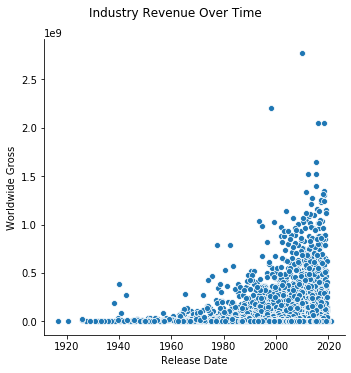

In [14]:
gross=sns.relplot(x='release_date_y', y="worldwide_gross", data=df, kind='scatter', palette = 'gray')
gross.set(xlabel='Release Date', ylabel='Worldwide Gross')
gross.fig.suptitle('Industry Revenue Over Time', y=1.03)

This graph isn't the most helpful, but it does tell us that movie industry as a whole has an upwards trend for the top end of grose! Which supports the Microsoft decision to start making movies.

### Looking at Return on Investment (ROI)

Instead of looking at film grose, let's look at return on investment by Genre, as we believe ROI is the best measure of a movies success and profitability. 

In [19]:
palette = ['#D3D3D3', '#C0C0C0','#A9A9A9','#808080','#69B537376969', '#1E90FF'] #color palette options for all charts
palette2 = ['#696969','#808080','#A9A9A9','#C0C0C0','#D3D3D3','#1E90FF']
palette3 = ['#696969','#808080','#B53737','#C0C0C0','#D3D3D3','#1E90FF']
sns.set_context = 'talk'

Text(0.5, 1.03, 'ROI trends over time')

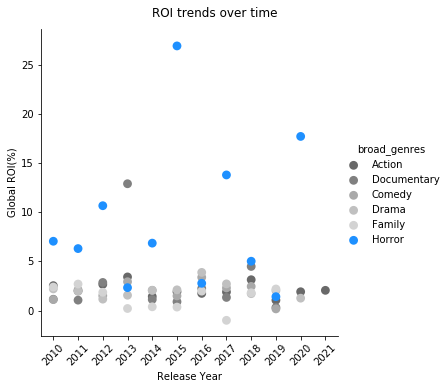

In [20]:
z = sns.catplot(x='start_year', y='global_ROI', data=primary_genre, kind='point', hue='broad_genres', join=None, 
                palette=palette2, ci=False)
z.set(xlabel='Release Year', ylabel='Global ROI(%)')
z.set_xticklabels(rotation=45)
z.fig.suptitle('ROI trends over time', y=1.03)

Text(0.5, 1.03, 'Global ROI by genre')

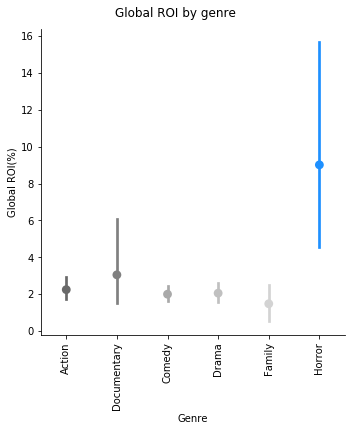

In [21]:
t = sns.catplot(x='broad_genres', y='global_ROI', data=primary_genre, kind='point', 
                palette=palette2, hue='broad_genres',join=None)
t.set(xlabel='Genre', ylabel='Global ROI(%)')
t.set_xticklabels(rotation = 90)
t.fig.suptitle('Global ROI by genre', y=1.03)

### Make Horror Movies!!

Whoa! This data clearly shows that horror movies are very profitable! The Return on Investment is much higher than for any other genre!

### Competition 

Let's have a look to see how many movies have been made in each genre?

Text(0.5, 1.03, 'Genre popularity with studios')

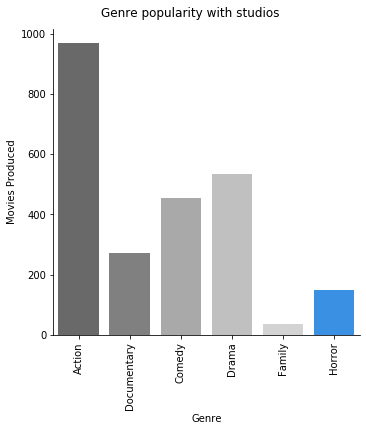

In [22]:
c = sns.catplot(x='broad_genres', data=primary_genre, kind='count', palette=palette2)
c.set(xlabel='Genre', ylabel='Movies Produced')
c.set_xticklabels(rotation = 90)
c.fig.suptitle('Genre popularity with studios', y=1.03)

Text(11.7, 8.5, 'Q1:5m, Q2:18m, Q3:45m, Max:425m')

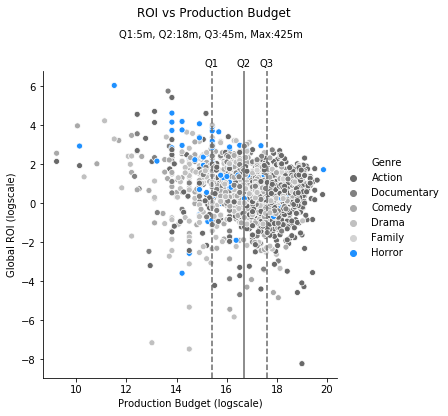

In [23]:
b = sns.relplot(x='production_budget_log', y='global_ROI_log', data=primary_genre, hue='broad_genres', 
            palette=palette2, kind='scatter')
b.set(xlabel='Production Budget (logscale)', ylabel='Global ROI (logscale)')
b.fig.suptitle('ROI vs Production Budget', y=1.15)
b._legend.texts[0].set_text('Genre')
plt.axvline(15.4, color="#696969", linestyle="--")
plt.text(15.1,7,'Q1',rotation=None)
plt.axvline(16.7, color="#696969", linestyle="-")
plt.text(16.4,7,'Q2',rotation=None)
plt.axvline(17.6, color="#696969", linestyle="--")
plt.text(17.3,7,'Q3',rotation=None)
plt.text(11.7,8.5,'Q1:5m, Q2:18m, Q3:45m, Max:425m',rotation=None)

Text(11.7, 8.5, 'Q1:5m, Q2:18m, Q3:45m, Max:425m')

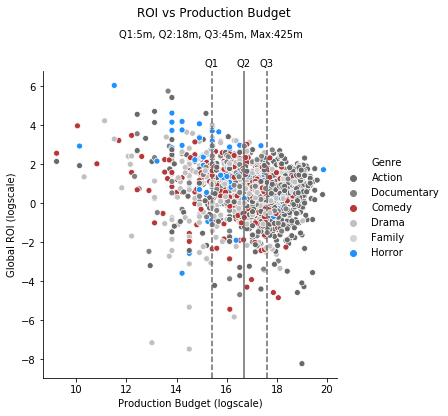

In [24]:
b = sns.relplot(x='production_budget_log', y='global_ROI_log', data=primary_genre, hue='broad_genres', 
            palette=palette3, kind='scatter')
b.set(xlabel='Production Budget (logscale)', ylabel='Global ROI (logscale)')
b.fig.suptitle('ROI vs Production Budget', y=1.15)
b._legend.texts[0].set_text('Genre')
plt.axvline(15.4, color="#696969", linestyle="--")
plt.text(15.1,7,'Q1',rotation=None)
plt.axvline(16.7, color="#696969", linestyle="-")
plt.text(16.4,7,'Q2',rotation=None)
plt.axvline(17.6, color="#696969", linestyle="--")
plt.text(17.3,7,'Q3',rotation=None)
plt.text(11.7,8.5,'Q1:5m, Q2:18m, Q3:45m, Max:425m',rotation=None)


### Recommendations Review: 

> Horror films produce significantly higher ROIs, than other genres.
>
> There is less competition in the horror genre and thus it will be easier to make your film stands out. 
>
> Make low-mid budget films, for a higher ROI.
>
> Distribute your investment risk across several films and you will increase your chances of a hit!


